In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
INPUT_DIR = "../data/input/"

df = pd.read_csv(INPUT_DIR + "train.csv")
test = pd.read_csv(INPUT_DIR + "test.csv")

In [7]:
def plot_feature_correlation(df, figsize=(12, 10), annot=False, cmap='coolwarm'):
    """
    指定したDataFrameに含まれる特徴量同士の相関係数行列をヒートマップで可視化する関数。

    Parameters
    ----------
    df : pd.DataFrame
        特徴量が格納されたデータフレーム。
    figsize : tuple, default=(12, 10)
        図の大きさ(width, height)を指定。
    annot : bool, default=False
        Trueにすると、各セル内に相関係数の数値が表示される。
    cmap : str, default='coolwarm'
        ヒートマップで使用するカラーマップ。

    Returns
    -------
    None
    """
    # 数値列のみを抽出
    numeric_df = df.select_dtypes(include=[np.number])
    
    if numeric_df.empty:
        raise ValueError("データフレームに数値列がありません。")

    # 相関行列を計算
    corr = numeric_df.corr()

    # 図のサイズを指定
    plt.figure(figsize=figsize)

    # ヒートマップを描画
    sns.heatmap(corr, annot=annot, fmt=".2f", cmap=cmap, square=True, 
                linewidths=.5, cbar_kws={"shrink": .5})

    plt.title("Feature Correlation Matrix (Numeric Features Only)", fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    

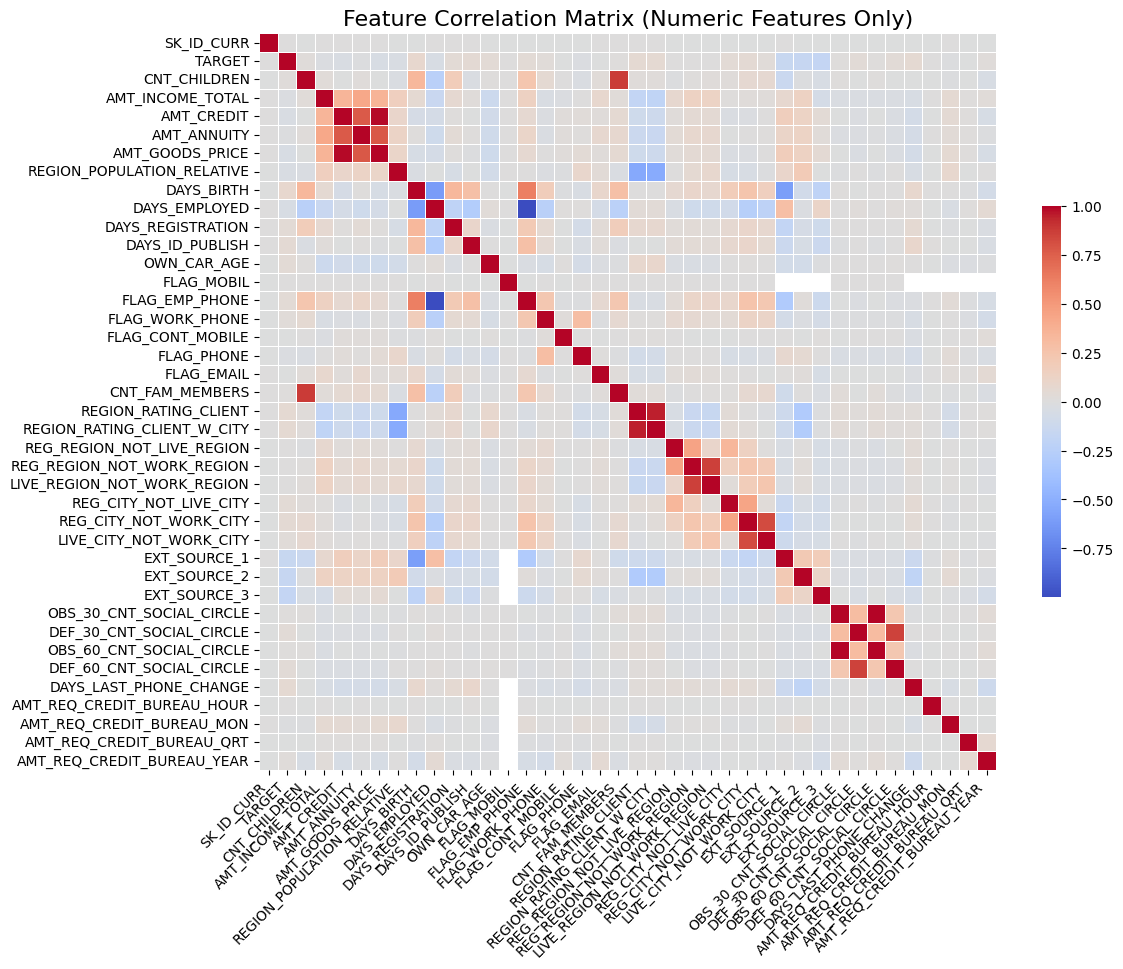

In [8]:
plot_feature_correlation(df)

In [9]:
def plot_pairwise_with_target(df, target_column='TARGET', features=None, figsize=(15, 15)):
    """
    「TARGET」と他の特徴量との散布図行列を描画する関数。

    Parameters
    ----------
    df : pd.DataFrame
        データフレーム。
    target_column : str, default='TARGET'
        ターゲット列の名前。
    features : list of str, optional
        プロットに含める特徴量のリスト。指定しない場合はすべての数値列が使用される。
    figsize : tuple, default=(15, 15)
        図の大きさ(width, height)を指定。

    Returns
    -------
    None
    """
    if target_column not in df.columns:
        raise ValueError(f"'{target_column}' 列がデータフレームに存在しません。")
    
    # 数値列のみを抽出
    numeric_df = df.select_dtypes(include=[np.number])
    
    if numeric_df.empty:
        raise ValueError("データフレームに数値列がありません。")
    
    if target_column not in numeric_df.columns:
        raise ValueError(f"'{target_column}' 列は数値列ではありません。")
    
    if features is not None:
        missing_features = set(features) - set(numeric_df.columns)
        if missing_features:
            raise ValueError(f"指定された特徴量 {missing_features} がデータフレームに存在しません。")
        numeric_df = numeric_df[[target_column] + features]
    
    # ペアプロットを描画
    sns.pairplot(numeric_df, hue=target_column, diag_kind='kde', corner=True)
    plt.suptitle("Pairwise Plots with TARGET", y=1.02, fontsize=16)
    plt.show()

# plot_pairwise_with_target(df)